# Image scaling from scratch

This code performs image scaling using linear interpolation from scratch. It takes an original color image, converts it to grayscale, resamples it to a reduced size (downscale), and then upscales it back to its original dimensions. The process involves linearly interpolating pixel values to achieve a smooth transformation. Mean Squared Error (MSE) is calculated to quantify the difference between the original and upscaled images, providing a measure of the accuracy of the interpolation. The code includes descriptions and docstrings for better understanding and documentation.

In [9]:
from PIL import Image # only used for open & save the image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Load the original image from disk

In [10]:
filename = 'avatar.jpg'
label = 'avatar'

In [11]:
original_image = np.array(Image.open(filename))

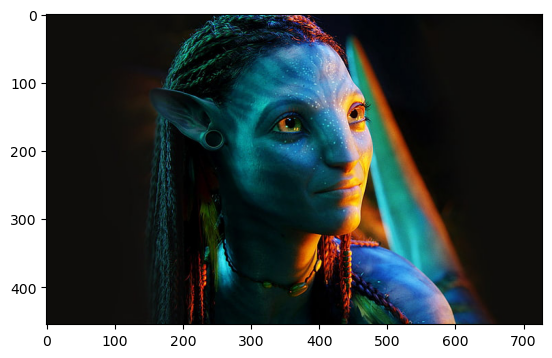

In [12]:
plt.imshow(original_image)
plt.show()

## Step 2: Convert the image to grayscale (8bpp format)

In [13]:
def rgb_to_gray(image):
    """
    Convert an RGB image to grayscale using the luminance formula.

    Args:
        image (numpy.ndarray): An RGB image represented as a NumPy array.

    Returns:
        numpy.ndarray: A grayscale image represented as a NumPy array.
    """
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

In [14]:
original_image_gray = rgb_to_gray(original_image)

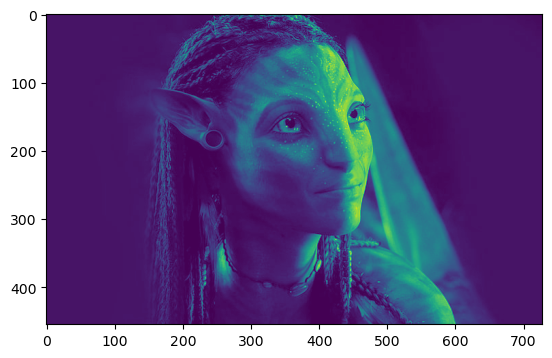

In [15]:
plt.imshow(original_image_gray)
plt.show()

## Step 3: Re-sample the image to 0.7 times its original dimensions using linear interpolation

In [16]:
downscale_factor = 0.7
new_height, new_width = map(int, (original_image_gray.shape[0] * downscale_factor, original_image_gray.shape[1] * downscale_factor))

In [17]:
resampled_image = np.zeros((new_height, new_width), dtype=np.uint8)

In [18]:
for y in range(new_height):
    for x in range(new_width):
        source_x = x / new_width * original_image_gray.shape[1]
        source_y = y / new_height * original_image_gray.shape[0]
        x0 = int(source_x)
        y0 = int(source_y)
        x1 = min(x0 + 1, original_image_gray.shape[1] - 1)
        y1 = min(y0 + 1, original_image_gray.shape[0] - 1)
        dx = source_x - x0
        dy = source_y - y0
        interpolated_value = (1 - dx) * (1 - dy) * original_image_gray[y0, x0] + \
                             dx * (1 - dy) * original_image_gray[y0, x1] + \
                             (1 - dx) * dy * original_image_gray[y1, x0] + \
                             dx * dy * original_image_gray[y1, x1]

        resampled_image[y, x] = int(interpolated_value)

### Save the resampled image

In [19]:
resampled_image = Image.fromarray(resampled_image)
resampled_image.save(f'{label}_resampled_image.jpg')

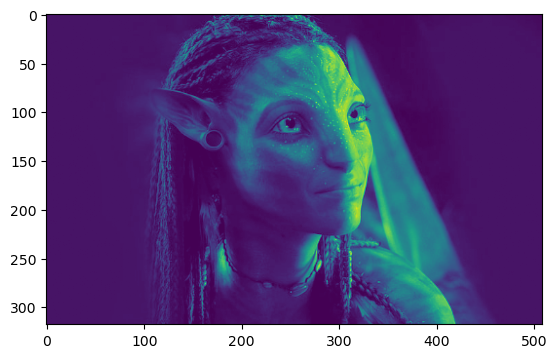

In [20]:
plt.imshow(resampled_image)
plt.show()

## Step 4: Resample the image back to its original size

In [21]:
upscaled_image = np.zeros_like(original_image_gray)

In [22]:
for y in range(original_image_gray.shape[0]):
    for x in range(original_image_gray.shape[1]):
        source_x = x / original_image_gray.shape[1] * new_width
        source_y = y / original_image_gray.shape[0] * new_height
        x0 = int(source_x)
        y0 = int(source_y)
        x1 = min(x0 + 1, new_width - 1)
        y1 = min(y0 + 1, new_height - 1)
        dx = source_x - x0
        dy = source_y - y0

        interpolated_value = (1 - dx) * (1 - dy) * resampled_image.getpixel((x0, y0)) + \
                             dx * (1 - dy) * resampled_image.getpixel((x1, y0)) + \
                             (1 - dx) * dy * resampled_image.getpixel((x0, y1)) + \
                             dx * dy * resampled_image.getpixel((x1, y1))

        upscaled_image[y, x] = int(interpolated_value)

### Save the upscaled image

In [23]:
upscaled_image = Image.fromarray(upscaled_image)
upscaled_image.save(f'{label}_upscaled_image.jpg')

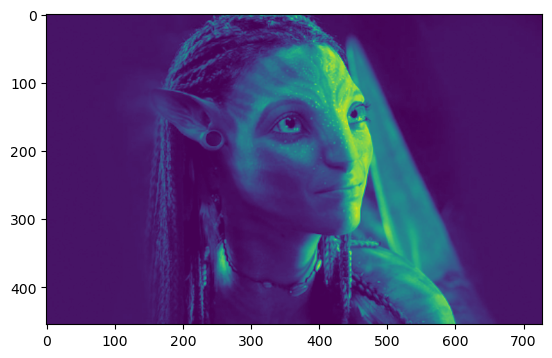

In [24]:
plt.imshow(upscaled_image)
plt.show()

## Step 5: Compute the sum of the average of the squared difference between pixels

In [25]:
difference_squared = (original_image_gray - upscaled_image) ** 2
mse = np.mean(difference_squared)

In [26]:
print(f"Mean Squared Error between original and rescaled image: {mse}")

Mean Squared Error between original and rescaled image: 9.388651732882503
